# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
sinasc_raw.loc[sinasc_raw ['munResLat'] >= float(-10.5), 'faixa_munResLat'] = 'Acima de -10.5'
sinasc_raw.loc[sinasc_raw ['munResLat'] < float(-10.5), 'faixa_munResLat'] = 'Abaixo de -10.5'
agrupamento_por_latitude = sinasc_raw.groupby('faixa_munResLat').agg({
    'QTDFILVIVO': [('soma', 'sum'), ('média', 'mean'), ('mínimo', 'min'), ('max', 'max'), ('mediana', 'median'), ('desvio padrão', 'std'), ('variância', 'var')],
    'QTDFILMORT': [('soma', 'sum'), ('média', 'mean'), ('mínimo', 'min'), ('max', 'max'), ('mediana', 'median'), ('desvio padrão', 'std'), ('variância', 'var')]
})
agrupamento_por_latitude.dropna()

QTDFILVIVO                                               \
                      soma     média mínimo   max mediana desvio padrão   
faixa_munResLat                                                           
Abaixo de -10.5    12600.0  0.980011    0.0  30.0     1.0      1.138300   
Acima de -10.5     14226.0  1.129317    0.0  12.0     1.0      1.198613   

                          QTDFILMORT                                 \
                variância       soma     média mínimo   max mediana   
faixa_munResLat                                                       
Abaixo de -10.5  1.295727     3105.0  0.242521    0.0  28.0     0.0   
Acima de -10.5   1.436674     3538.0  0.291770    0.0   9.0     0.0   

                                         
                desvio padrão variância  
faixa_munResLat                          
Abaixo de -10.5      0.599430  0.359317  
Acima de -10.5       0.627856  0.394204

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [4]:
sinasc_raw.loc[sinasc_raw['munResArea'] >= 3000, 'faixa_munResArea'] = 'Acima de 3000'
sinasc_raw.loc[sinasc_raw['munResArea'] < 3000, 'faixa_munResArea'] = 'Abaixo de 3000'

agrupamento_por_area = sinasc_raw.groupby('faixa_munResArea').agg({
   'ESTCIVMAE': [('soma', 'sum'), ('média', 'mean'), ('mínimo', 'min'), ('max', 'max'), ('mediana', 'median'), ('desvio padrão', 'std'), ('variância', 'var')],
   'IDADEMAE': [('soma', 'sum'), ('média', 'mean'), ('mínimo', 'min'), ('max', 'max'), ('mediana', 'median'), ('desvio padrão', 'std'), ('variância', 'var')]
})
agrupamento_por_area.dropna()


ESTCIVMAE                                              \
                      soma     média mínimo  max mediana desvio padrão   
faixa_munResArea                                                         
Abaixo de 3000     13340.0  2.578774    1.0  9.0     2.0      1.582431   
Acima de 3000      54643.0  2.537169    1.0  9.0     2.0      1.691778   

                           IDADEMAE                                \
                 variância     soma      média mínimo max mediana   
faixa_munResArea                                                    
Abaixo de 3000    2.504089   137389  26.324775     11  53    26.0   
Acima de 3000     2.862114   567848  26.038518     12  53    25.0   

                                           
                 desvio padrão  variância  
faixa_munResArea                           
Abaixo de 3000        6.305535  39.759775  
Acima de 3000         6.405497  41.030387

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
meidana_munResAlt = sinasc_raw['munResAlt'].median()

sinasc_raw.loc[sinasc_raw['munResAlt'] >= meidana_munResAlt, 'faixa_munResAlt'] = 'Acima da mediana (153)'
sinasc_raw.loc[sinasc_raw['munResAlt'] < meidana_munResAlt, 'faixa_munResAlt'] = 'Abaixo da mediana (153)'

agrupamento_por_altitude = sinasc_raw.groupby('faixa_munResAlt').agg({
   'munResLat': [('soma', 'sum'), ('média', 'mean'), ('mínimo', 'min'), ('máximo', 'max'), ('mediana', 'median'), ('desvio padrão', 'std'), ('variância', 'var')],
   'munResArea': [('soma', 'sum'), ('média', 'mean'), ('mínimo', 'min'), ('máximo', 'max'), ('mediana', 'median'), ('desvio padrão', 'std'), ('variância', 'var')]
})
agrupamento_por_altitude.dropna()


munResLat                                          \
                                 soma      média    mínimo   máximo   mediana   
faixa_munResAlt                                                                 
Abaixo da mediana (153) -120203.74646  -9.218786 -12.43601 -8.76889  -8.76889   
Acima da mediana (153)  -160282.12914 -11.458545 -13.49976 -9.85139 -11.43387   

                                                   munResArea                \
                        desvio padrão variância          soma         média   
faixa_munResAlt                                                               
Abaixo da mediana (153)      0.763650  0.583161  3.287333e+08  25211.543297   
Acima da mediana (153)       0.823543  0.678223  6.863926e+07   4907.010027   

                                                                       \
                           mínimo     máximo    mediana desvio padrão   
faixa_munResAlt                                                         
Abaixo da mediana (153)  1717.640  34096.394  34096.394  12827.346980   
Acima da mediana (153)    459.978  11518.915   3792.998   3270.463236   

                                       
                            variância  
faixa_munResAlt                        
Abaixo da mediana (153)  1.645408e+08  
Acima da mediana (153)   1.069593e+07

In [6]:
sinasc_raw.select_dtypes(include=['number'])

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,...,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,NaN,0.0,0.0,110001,...,1,1,1,0,5,1,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,999992.0,1.0,0.0,110001,...,1,1,5,1,5,2,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,513205.0,2.0,0.0,110001,...,1,1,7,1,5,3,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,231205.0,0.0,0.0,110037,...,1,1,2,0,4,4,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,999992.0,1.0,0.0,110001,...,1,1,5,1,5,5,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,333115.0,1.0,0.0,110030,...,1,1,7,1,5,2767632,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,999992.0,0.0,0.0,110092,...,1,1,1,0,5,2772678,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,421125.0,0.0,1.0,110030,...,1,1,3,1,5,2776905,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,999992.0,1.0,0.0,110030,...,1,1,10,1,5,2777105,-12.74137,-60.13858,595.0,11518.915


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [7]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"}



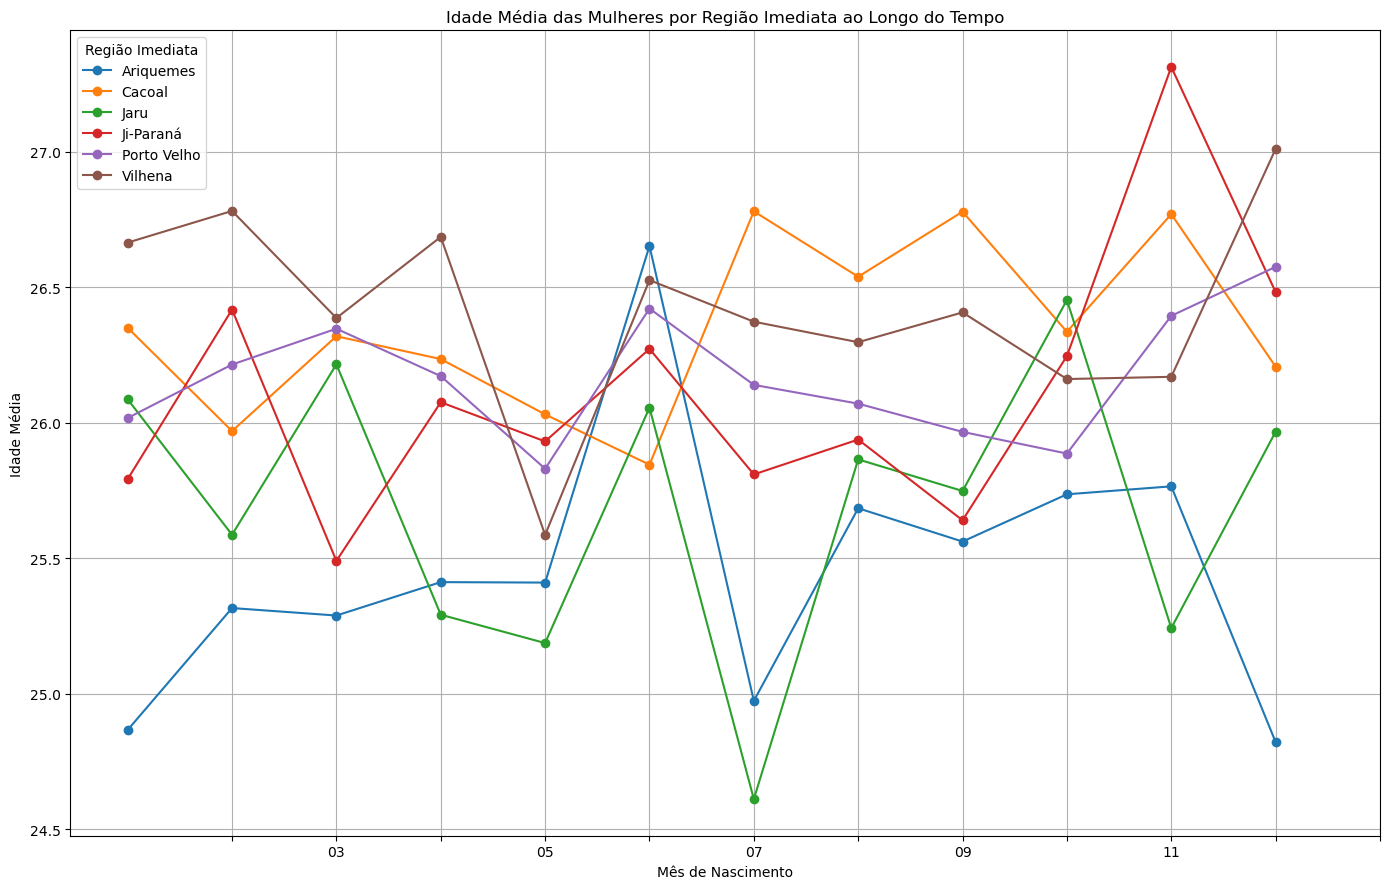

In [8]:
sinasc_raw['Região Imediata'] = sinasc_raw['munResNome'].map(imediatas)
sinasc_raw['Mes_Nasc'] = sinasc_raw['DTNASC'].str.slice(5, 7)  # Extrai o mês
idade_media_por_regiao = sinasc_raw.groupby(['Mes_Nasc', 'Região Imediata'])['IDADEMAE'].mean().unstack()

# Plotagem
idade_media_por_regiao.plot(kind='line', marker='o', figsize=(14, 9))
plt.title('Idade Média das Mulheres por Região Imediata ao Longo do Tempo')
plt.xlabel('Mês de Nascimento')
plt.ylabel('Idade Média')
plt.xticks(np.arange(1, 13, 1))
plt.xticks(rotation=0)
plt.legend(title='Região Imediata')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
len(imediatas)

52

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [10]:
municipios_idh = {
    "Porto Velho": 0.736,
    "Ariquemes": 0.702,
    "Ji-Paraná": 0.714,
    "Cacoal": 0.718,
    "Vilhena": 0.731,
    "Guajará-Mirim": 0.657,
    "Jaru": 0.689,
    "Governador Jorge Teixeira": 0.596,
    "Machadinho D'Oeste": 0.596,
    "Alto Paraíso": 0.625,
    "Candeias do Jamari": 0.649,
    "Buritis": 0.616,
    "Cacaulândia": 0.646,
    "Campo Novo de Rondônia": 0.593,
    "Cujubim": 0.612,
    "Monte Negro": 0.607,
    "Rio Crespo": 0.643,
    "Theobroma": 0.589,
    "Vale do Anari": 0.584,
    "Alvorada D'Oeste": 0.643,
    "Costa Marques": 0.611,
    "Mirante da Serra": 0.643,
    "Nova União": 0.587,
    "Ouro Preto do Oeste": 0.682,
    "Presidente Médici": 0.664,
    "São Francisco do Guaporé": 0.611,
    "São Miguel do Guaporé": 0.646,
    "Seringueiras": 0.598,
    "Teixeirópolis": 0.643,
    "Urupá": 0.609,
    "Vale do Paraíso": 0.627,
    "Alta Floresta D'Oeste": 0.641,
    "Alto Alegre dos Parecis": 0.592,
    "Castanheiras": 0.658,
    "Espigão D'Oeste": 0.672,
    "Ministro Andreazza": 0.638,
    "Nova Brasilândia D'Oeste": 0.643,
    "Novo Horizonte do Oeste": 0.634,
    "Parecis": 0.617,
    "Pimenta Bueno": 0.710,
    "Primavera de Rondônia": 0.641,
    "Rolim de Moura": 0.700,
    "Santa Luzia D'Oeste": 0.670,
    "São Felipe D'Oeste": 0.649,
    "Cabixi": 0.650,
    "Cerejeiras": 0.692,
    "Chupinguaia": 0.652,
    "Colorado do Oeste": 0.685,
    "Corumbiara": 0.613,
    "Pimenteiras do Oeste": 0.665
}


In [11]:
sinasc_raw['IDH_municipio'] = sinasc_raw['munResNome'].map(municipios_idh)
sinasc_raw['IDH_municipio']

0        0.641
1        0.641
2        0.641
3        0.592
4        0.641
         ...  
27023    0.731
27024    0.652
27025    0.731
27026    0.731
27027    0.634
Name: IDH_municipio, Length: 27028, dtype: float64

In [12]:
faixa_idh_municipal = {
    "Porto Velho": "IDH alto",
    "Ariquemes": "IDH alto",
    "Ji-Paraná": "IDH alto",
    "Cacoal": "IDH alto",
    "Vilhena": "IDH alto",
    "Guajará-Mirim": "IDH médio",
    "Jaru": "IDH médio",
    "Governador Jorge Teixeira": "IDH baixo",
    "Machadinho D'Oeste": "IDH baixo",
    "Alto Paraíso": "IDH médio",
    "Candeias do Jamari": "IDH médio",
    "Buritis": "IDH baixo",
    "Cacaulândia": "IDH médio",
    "Campo Novo de Rondônia": "IDH baixo",
    "Cujubim": "IDH médio",
    "Monte Negro": "IDH médio",
    "Rio Crespo": "IDH médio",
    "Theobroma": "IDH baixo",
    "Vale do Anari": "IDH baixo",
    "Alvorada D'Oeste": "IDH médio",
    "Costa Marques": "IDH médio",
    "Mirante da Serra": "IDH médio",
    "Nova União": "IDH baixo",
    "Ouro Preto do Oeste": "IDH alto",
    "Presidente Médici": "IDH médio",
    "São Francisco do Guaporé": "IDH médio",
    "São Miguel do Guaporé": "IDH médio",
    "Seringueiras": "IDH baixo",
    "Teixeirópolis": "IDH médio",
    "Urupá": "IDH médio",
    "Alta Floresta D'Oeste": "IDH médio",
    "Alto Alegre dos Parecis": "IDH baixo",
    "Castanheiras": "IDH médio",
    "Espigão D'Oeste": "IDH médio",
    "Ministro Andreazza": "IDH médio",
    "Nova Brasilândia D'Oeste": "IDH médio",
    "Novo Horizonte do Oeste": "IDH médio",
    "Parecis": "IDH médio",
    "Pimenta Bueno": "IDH alto",
    "Primavera de Rondônia": "IDH médio",
    "Rolim de Moura": "IDH alto",
    "Santa Luzia D'Oeste": "IDH médio",
    "São Felipe D'Oeste": "IDH médio",
    "Cabixi": "IDH médio",
    "Cerejeiras": "IDH alto",
    "Chupinguaia": "IDH médio",
    "Colorado do Oeste": "IDH médio",
    "Corumbiara": "IDH médio",
    "Pimenteiras do Oeste": "IDH médio"
}

In [13]:
sinasc_raw['Faixa_IDH'] = sinasc_raw['munResNome'].map(faixa_idh_municipal)

sinasc_agrupado = sinasc_raw.groupby(['Faixa_IDH', 'ESCMAE'])[['QTDFILVIVO', 'QTDFILMORT']].sum().reset_index()

# Calcular a soma total de QTDFIL
sinasc_agrupado['QTDFIL'] = sinasc_agrupado['QTDFILVIVO'] + sinasc_agrupado['QTDFILMORT']

# Calcular as porcentagens corretamente
sinasc_agrupado['Porcentagem_QTDFILVIVO'] = (sinasc_agrupado['QTDFILVIVO'] / sinasc_agrupado['QTDFIL']) * 100
sinasc_agrupado['Porcentagem_QTDFILMORT'] = (sinasc_agrupado['QTDFILMORT'] / sinasc_agrupado['QTDFIL']) * 100

# arredondamento para duas casas decimais
sinasc_agrupado['Porcentagem_QTDFILVIVO'] = sinasc_agrupado['Porcentagem_QTDFILVIVO'].round(2)
sinasc_agrupado['Porcentagem_QTDFILMORT'] = sinasc_agrupado['Porcentagem_QTDFILMORT'].round(2)

total_QTDFIL = sinasc_agrupado['QTDFIL'].sum()
total_QTDFILVIVO = sinasc_agrupado['QTDFILVIVO'].sum()
total_QTDFILMORT = sinasc_agrupado['QTDFILMORT'].sum()

total_porcentagem_QTDFILVIVO = round((total_QTDFILVIVO / total_QTDFIL) * 100,2)
total_porcentagem_QTDFILMORT = round((total_QTDFILMORT / total_QTDFIL) * 100,2)

# Adicionar a linha Total com as porcentagens totais
sinasc_agrupado.loc['Total'] = {'Faixa_IDH': np.nan, 'ESCMAE': np.nan, 'QTDFILVIVO': total_QTDFILVIVO,
                                 'QTDFILMORT': total_QTDFILMORT, 'Porcentagem_QTDFILVIVO': total_porcentagem_QTDFILVIVO,
                                 'Porcentagem_QTDFILMORT': total_porcentagem_QTDFILMORT}

# Remover a coluna QTDFIL se não for mais necessária
sinasc_agrupado.drop('QTDFIL', axis=1, inplace=True)

sinasc_agrupado




,Faixa_IDH,ESCMAE,QTDFILVIVO,QTDFILMORT,Porcentagem_QTDFILVIVO,Porcentagem_QTDFILMORT
0,IDH alto,1 a 3 anos,688.0,134.0,83.70,16.30
1,IDH alto,12 anos ou mais,2862.0,1080.0,72.60,27.40
2,IDH alto,4 a 7 anos,4162.0,815.0,83.62,16.38
3,IDH alto,8 a 11 anos,8970.0,2353.0,79.22,20.78
4,IDH alto,Nenhuma,91.0,12.0,88.35,11.65
5,IDH baixo,1 a 3 anos,127.0,18.0,87.59,12.41
6,IDH baixo,12 anos ou mais,206.0,47.0,81.42,18.58
7,IDH baixo,4 a 7 anos,546.0,128.0,81.01,18.99
8,IDH baixo,8 a 11 anos,969.0,223.0,81.29,18.71
9,IDH baixo,Nenhuma,0.0,2.0,0.00,100.00


In [14]:
# Adicionando a coluna Faixa_IDH aos dados
sinasc_raw['Faixa_IDH'] = sinasc_raw['munResNome'].map(faixa_idh_municipal)

# Preenchendo valores ausentes com zero nas colunas QTDFILVIVO e QTDFILMORT
sinasc_raw[['QTDFILVIVO', 'QTDFILMORT']] = sinasc_raw[['QTDFILVIVO', 'QTDFILMORT']].fillna(0)

# Recalculando a soma total de QTDFIL
sinasc_raw['QTDFIL'] = sinasc_raw['QTDFILVIVO'] + sinasc_raw['QTDFILMORT']

sinasc_pivot = pd.pivot_table(sinasc_raw, 
                               values=['QTDFILVIVO', 'QTDFILMORT', 'QTDFIL'], 
                               index=['Faixa_IDH', 'ESCMAE'], 
                               aggfunc={'QTDFILVIVO': np.sum, 
                                        'QTDFILMORT': np.sum, 
                                        'QTDFIL': np.sum},
                             margins=True,
                             margins_name='Total')
# Calculando as porcentagens de QTDFILVIVO e QTDFILMORT em relação ao total QTDFIL
sinasc_pivot['Porcentagem_QTDFILVIVO'] = (sinasc_pivot['QTDFILVIVO'] / sinasc_pivot['QTDFIL']) * 100
sinasc_pivot['Porcentagem_QTDFILMORT'] = (sinasc_pivot['QTDFILMORT'] / sinasc_pivot['QTDFIL']) * 100

# Arredondando para duas casas decimais
sinasc_pivot['Porcentagem_QTDFILVIVO'] = sinasc_pivot['Porcentagem_QTDFILVIVO'].round(2)
sinasc_pivot['Porcentagem_QTDFILMORT'] = sinasc_pivot['Porcentagem_QTDFILMORT'].round(2)

sinasc_pivot.drop(columns=['QTDFIL'], inplace=True)
sinasc_pivot = sinasc_pivot.rename_axis(index={'Faixa_IDH': 'Faixa de IDH', 'ESCMAE': 'Escolaridade da Mãe'})
# Renomeando as colunas
sinasc_pivot.columns = ['QTDFILMORT', 'QTDFILVIVO', 
                        'Porcentagem_QTDFILVIVO(%)', 'Porcentagem_QTDFILMORT(%)']

# Mostrando a tabela pivot resultante
sinasc_pivot



C:\Users\raul_\AppData\Local\Temp\ipykernel_33856\1354325213.py:10: FutureWarning: The provided callable <function sum at 0x000001F981D14860> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sinasc_pivot = pd.pivot_table(sinasc_raw,
C:\Users\raul_\AppData\Local\Temp\ipykernel_33856\1354325213.py:10: FutureWarning: The provided callable <function sum at 0x000001F981D14860> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sinasc_pivot = pd.pivot_table(sinasc_raw,


QTDFILMORT  QTDFILVIVO  \
Faixa de IDH Escolaridade da Mãe                           
IDH alto     1 a 3 anos                134.0       688.0   
             12 anos ou mais          1080.0      2862.0   
             4 a 7 anos                815.0      4162.0   
             8 a 11 anos              2353.0      8970.0   
             Nenhuma                    12.0        91.0   
IDH baixo    1 a 3 anos                 18.0       127.0   
             12 anos ou mais            47.0       206.0   
             4 a 7 anos                128.0       546.0   
             8 a 11 anos               223.0       969.0   
             Nenhuma                     2.0         0.0   
IDH médio    1 a 3 anos                 56.0       345.0   
             12 anos ou mais           215.0       779.0   
             4 a 7 anos                399.0      2050.0   
             8 a 11 anos               917.0      3906.0   
             Nenhuma                     3.0        52.0   
Total                                 6402.0     25753.0   

                                  Porcentagem_QTDFILVIVO(%)  \
Faixa de IDH Escolaridade da Mãe                              
IDH alto     1 a 3 anos                               83.70   
             12 anos ou mais                          72.60   
             4 a 7 anos                               83.62   
             8 a 11 anos                              79.22   
             Nenhuma                                  88.35   
IDH baixo    1 a 3 anos                               87.59   
             12 anos ou mais                          81.42   
             4 a 7 anos                               81.01   
             8 a 11 anos                              81.29   
             Nenhuma                                   0.00   
IDH médio    1 a 3 anos                               86.03   
             12 anos ou mais                          78.37   
             4 a 7 anos                               83.71   
             8 a 11 anos                              80.99   
             Nenhuma                                  94.55   
Total                                                 80.09   

                                  Porcentagem_QTDFILMORT(%)  
Faixa de IDH Escolaridade da Mãe                             
IDH alto     1 a 3 anos                               16.30  
             12 anos ou mais                          27.40  
             4 a 7 anos                               16.38  
             8 a 11 anos                              20.78  
             Nenhuma                                  11.65  
IDH baixo    1 a 3 anos                               12.41  
             12 anos ou mais                          18.58  
             4 a 7 anos                               18.99  
             8 a 11 anos                              18.71  
             Nenhuma                                 100.00  
IDH médio    1 a 3 anos                               13.97  
             12 anos ou mais                          21.63  
             4 a 7 anos                               16.29  
             8 a 11 anos                              19.01  
             Nenhuma                                   5.45  
Total                                                 19.91

É curioso notar que em IDHs alto e médio, quanto maior for a escolaridade da mãe, maior é a taxa de mortalidade dos bebes. É algo que talvez mereça um estudo mais aprofundado que vise explicar tal fenomeno. 

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [15]:
faixa_ifdm_municipal = {
    "Ariquemes": "Moderado",
    "Vilhena": "Moderado",
    "Pimenta Bueno": "Moderado",
    "Porto Velho": "Moderado",
    "Ji-Paraná": "Moderado",
    "Cacoal": "Moderado",
    "Santa Luzia D'Oeste": "Moderado",
    "Rolim de Moura": "Moderado",
    "Chupinguaia": "Moderado",
    "São Miguel do Guaporé": "Moderado",
    "Pimenteiras do Oeste": "Moderado",
    "Teixeirópolis": "Moderado",
    "Colorado do Oeste": "Moderado",
    "Jaru": "Moderado",
    "Rio Crespo": "Moderado",
    "Primavera de Rondônia": "Moderado",
    "Alta Floresta D'Oeste": "Moderado",
    "Ouro Preto do Oeste": "Moderado",
    "São Francisco do Guaporé": "Moderado",
    "Candeias do Jamari": "Moderado",
    "Buritis": "Moderado",
    "São Felipe D'Oeste": "Moderado",
    "Presidente Médici": "Moderado",
    "Cerejeiras": "Moderado",
    "Monte Negro": "Moderado",
    "Urupá": "Moderado",
    "Espigão D'Oeste": "Regular",
    "Seringueiras": "Regular",
    "Alvorada D'Oeste": "Regular",
    "Itapuã do Oeste": "Regular",
    "Cabixi": "Regular",
    "Novo Horizonte do Oeste": "Regular",
    "Nova Brasilândia D'Oeste": "Regular",
    "Vale do Paraíso": "Regular",
    "Corumbiara": "Regular",
    "Alto Paraíso": "Regular",
    "Cacaulândia": "Regular",
    "Vale do Anari": "Regular",
    "Ministro Andreazza": "Regular",
    "Costa Marques": "Regular",
    "Nova União": "Regular",
    "Guajará-Mirim": "Regular",
    "Mirante da Serra": "Regular",
    "Parecis": "Regular",
    "Castanheiras": "Regular",
    "Theobroma": "Regular",
    "Machadinho D'Oeste": "Regular",
    "Campo Novo de Rondônia": "Regular",
    "Nova Mamoré": "Regular",
    "Cujubim": "Regular",
    "Alto Alegre dos Parecis": "Regular",
    "Governador Jorge Teixeira": "Regular"
}






In [16]:
sinasc_raw['Faixa_IFDM'] = sinasc_raw['munResNome'].map(faixa_ifdm_municipal)
Agrupamento_ifdm = sinasc_raw.groupby(['Faixa_IFDM', 'ESCMAE'])[['IDADEMAE','IDADEPAI']].mean()
Agrupamento_ifdm['IDADEMAE'] = round(Agrupamento_ifdm['IDADEMAE'],2)
Agrupamento_ifdm['IDADEPAI'] = round(Agrupamento_ifdm['IDADEPAI'],2)
Agrupamento_ifdm['Dif_media_idade'] = Agrupamento_ifdm['IDADEPAI']-Agrupamento_ifdm['IDADEMAE']
Agrupamento_ifdm

IDADEMAE  IDADEPAI  Dif_media_idade
Faixa_IFDM ESCMAE                                              
Moderado   1 a 3 anos          28.27     33.16             4.89
           12 anos ou mais     29.64     33.03             3.39
           4 a 7 anos          24.47     30.82             6.35
           8 a 11 anos         25.24     29.91             4.67
           Nenhuma             30.50     39.75             9.25
Regular    1 a 3 anos          28.96     35.27             6.31
           12 anos ou mais     28.84     32.35             3.51
           4 a 7 anos          25.06     31.95             6.89
           8 a 11 anos         24.80     30.52             5.72
           Nenhuma             34.80     36.00             1.20

In [17]:
sinasc_raw['Faixa_IFDM'] = sinasc_raw['munResNome'].map(faixa_ifdm_municipal)

sinasc_pivot_ifdm = pd.pivot_table(sinasc_raw, 
                                    values=['IDADEMAE', 'IDADEPAI'], 
                                    index=['Faixa_IFDM', 'ESCMAE'], 
                                    aggfunc={'IDADEMAE': 'mean', 
                                             'IDADEPAI': 'mean'},  
                                    margins=True,
                                    margins_name='Total')
sinasc_pivot_ifdm['IDADEMAE'] = round(sinasc_pivot_ifdm['IDADEMAE'],2)
sinasc_pivot_ifdm['IDADEPAI'] = round(sinasc_pivot_ifdm['IDADEPAI'],2)
sinasc_pivot_ifdm['Dif_media_idade'] = sinasc_pivot_ifdm['IDADEPAI']-sinasc_pivot_ifdm['IDADEMAE']


sinasc_pivot_ifdm

IDADEMAE  IDADEPAI  Dif_media_idade
Faixa_IFDM ESCMAE                                              
Moderado   1 a 3 anos          28.27     33.16             4.89
           12 anos ou mais     29.64     33.03             3.39
           4 a 7 anos          24.47     30.82             6.35
           8 a 11 anos         25.24     29.91             4.67
           Nenhuma             30.50     39.75             9.25
Regular    1 a 3 anos          28.96     35.27             6.31
           12 anos ou mais     28.84     32.35             3.51
           4 a 7 anos          25.06     31.95             6.89
           8 a 11 anos         24.80     30.52             5.72
           Nenhuma             34.80     36.00             1.20
Total                          26.98     31.09             4.11

O pai tem uma média de idade muito maior que a da mãe. Chegando a pouco mais de 9 anos de diferença de média para um IFDM moderado com a mãe sem qualquer escolaridade. A menor diferença se econtra em municipios com IFDM regular para uma mãe sem ecolaridade. Com apenas 1.2 anos de diferença na média das idades.

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [18]:
faixa_pib_municipal = {
    "Porto Velho": "Acima de 1Bi",
    "Ji-Paraná": "Acima de 1Bi",
    "Vilhena": "Acima de 1Bi",
    "Ariquemes": "Acima de 1Bi",
    "Cacoal": "Acima de 1Bi",
    "Guajará-Mirim": "500M-1Bi",
    "Jaru": "500M-1Bi",
    "Governador Jorge Teixeira": "200M-300M",
    "Machadinho D'Oeste": "200M-300M",
    "Alto Paraíso": "500M-1Bi",
    "Candeias do Jamari": "500M-1Bi",
    "Buritis": "100M-200M",
    "Cacaulândia": "500M-1Bi",
    "Campo Novo de Rondônia": "100M-200M",
    "Cujubim": "500M-1Bi",
    "Monte Negro": "200M-300M",
    "Rio Crespo": "Abaixo de 100M",
    "Theobroma": "Abaixo de 100M",
    "Vale do Anari": "Abaixo de 100M",
    "Alvorada D'Oeste": "500M-1Bi",
    "Costa Marques": "100M-200M",
    "Mirante da Serra": "100M-200M",
    "Nova União": "Abaixo de 100M",
    "Ouro Preto do Oeste": "Acima de 1Bi",
    "Presidente Médici": "100M-200M",
    "São Francisco do Guaporé": "500M-1Bi",
    "São Miguel do Guaporé": "500M-1Bi",
    "Seringueiras": "Abaixo de 100M",
    "Teixeirópolis": "500M-1Bi",
    "Urupá": "500M-1Bi",
    "Alta Floresta D'Oeste": "200M-300M",
    "Alto Alegre dos Parecis": "Abaixo de 100M",
    "Castanheiras": "500M-1Bi",
    "Espigão D'Oeste": "Abaixo de 100M",
    "Ministro Andreazza": "Abaixo de 100M",
    "Nova Brasilândia D'Oeste": "Abaixo de 100M",
    "Novo Horizonte do Oeste": "Abaixo de 100M",
    "Parecis": "Abaixo de 100M",
    "Pimenta Bueno": "Acima de 1Bi",
    "Primavera de Rondônia": "Abaixo de 100M",
    "Rolim de Moura": "Acima de 1Bi",
    "Santa Luzia D'Oeste": "Abaixo de 100M",
    "São Felipe D'Oeste": "Abaixo de 100M",
    "Cabixi": "Abaixo de 100M",
    "Cerejeiras": "Acima de 1Bi",
    "Chupinguaia": "Abaixo de 100M",
    "Colorado do Oeste": "Abaixo de 100M",
    "Corumbiara": "Abaixo de 100M",
    "Pimenteiras do Oeste": "Abaixo de 100M",
    "Itapuã do Oeste": "100M-200M",
    "Nova Mamoré" : "500M-1Bi",
    "Vale do Paraíso": "100M-200M" 
}


In [19]:
sinasc_raw['Faixa_PIB'] = sinasc_raw['munResNome'].map(faixa_pib_municipal)
sinasc_raw_2 = sinasc_raw[['Faixa_PIB', 'PARTO']]
# Calcular o total de cada faixa de PIB e tipo de parto
Agrupamento_PIB = sinasc_raw_2.groupby(['Faixa_PIB', 'PARTO']).size().reset_index(name='Total')

# Calcular a porcentagem de cada tipo de parto em relação à faixa de PIB
Agrupamento_PIB['Total_Faixa_PIB'] = Agrupamento_PIB.groupby('Faixa_PIB')['Total'].transform('sum')
Agrupamento_PIB['Porcentagem'] = (Agrupamento_PIB['Total'] / Agrupamento_PIB['Total_Faixa_PIB']) * 100

# Exibir o DataFrame com as colunas de porcentagem adicionadas
Agrupamento_PIB.drop(columns=['Total_Faixa_PIB'])



,Faixa_PIB,PARTO,Total,Porcentagem
0,100M-200M,Cesáreo,1155,70.512821
1,100M-200M,Vaginal,483,29.487179
2,200M-300M,Cesáreo,814,69.276596
3,200M-300M,Vaginal,361,30.723404
4,500M-1Bi,Cesáreo,2557,63.057953
5,500M-1Bi,Vaginal,1498,36.942047
6,Abaixo de 100M,Cesáreo,1935,79.958678
7,Abaixo de 100M,Vaginal,485,20.041322
8,Acima de 1Bi,Cesáreo,11575,65.432448
9,Acima de 1Bi,Vaginal,6115,34.567552


Nota-se em Rondônia, que quanto maior o PIB do município, maior será a a preferência por parto vaginal.